# TASK - 1

- TITANIC PREDICTION
- KOLLI. SRI LAKSHMI

# IMPORTING LIBRARIES AND DATASET

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv("/home/sri/Desktop/sristart/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
df.shape

(418, 12)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [130]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# DATA PRE-PROCESSING AND CLEANING

In [131]:
dff = df.drop(['PassengerId', 'Ticket','Name'], axis=1)
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [132]:
dff.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [133]:
dff[dff['Fare'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,0,3,male,60.5,0,0,NaN,NaN,S


In [134]:
dff["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [135]:
dff["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [136]:
object_col = dff.select_dtypes(include='object').columns
object_col

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [137]:
for col in object_col:
    print('--'*16)
    print(dff[col].value_counts(dropna=False))
    print('--'*16)

--------------------------------
Sex
male      266
female    152
Name: count, dtype: int64
--------------------------------
--------------------------------
Cabin
NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64
--------------------------------
--------------------------------
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
--------------------------------


In [138]:
dff['Age'] = dff['Age'].fillna(dff.groupby(['Pclass','Sex']).Age.transform('median'))

In [139]:
dff.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [140]:
dff.drop('Cabin',axis=1,inplace=True)
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,24.0,0,0,8.0500,S


In [141]:
dff.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [142]:
dff['is_alone'] =((dff.SibSp == 0) & (dff.Parch == 0))*1
dff.is_alone

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    1
415    1
416    1
417    0
Name: is_alone, Length: 418, dtype: int64

In [143]:
dff=dff.dropna(how="any")
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,0,3,male,34.5,0,0,7.8292,Q,1
1,1,3,female,47.0,1,0,7.0000,S,0
2,0,2,male,62.0,0,0,9.6875,Q,1
3,0,3,male,27.0,0,0,8.6625,S,1
4,1,3,female,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S,1
414,1,1,female,39.0,0,0,108.9000,C,1
415,0,3,male,38.5,0,0,7.2500,S,1
416,0,3,male,24.0,0,0,8.0500,S,1


In [144]:
dff.dropna(inplace=True)
dff.isnull().sum()

/tmp/ipykernel_11809/3466940955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.dropna(inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
is_alone    0
dtype: int64

In [145]:
df_dummy = pd.get_dummies(data=dff["Embarked"], drop_first=True)
df_dummy

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
413,False,True
414,False,False
415,False,True
416,False,True


In [146]:
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_alone
0,0,3,male,34.5,0,0,7.8292,Q,1
1,1,3,female,47.0,1,0,7.0000,S,0
2,0,2,male,62.0,0,0,9.6875,Q,1
3,0,3,male,27.0,0,0,8.6625,S,1
4,1,3,female,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S,1
414,1,1,female,39.0,0,0,108.9000,C,1
415,0,3,male,38.5,0,0,7.2500,S,1
416,0,3,male,24.0,0,0,8.0500,S,1


# VISUALIZATION

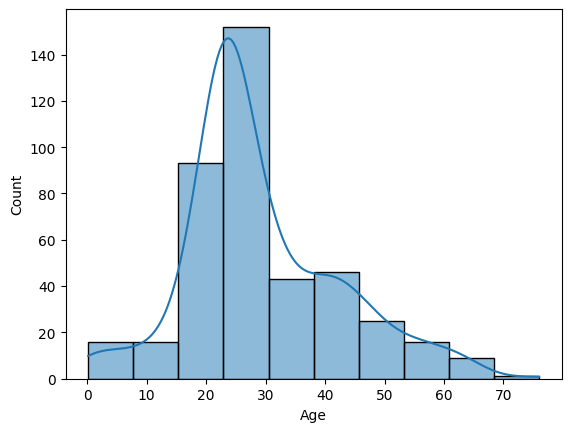

In [147]:
sns.histplot(data=dff,x=dff['Age'],kde=True,bins=10);

In [148]:
dff.Age.mean()

29.223021582733814

In [149]:
dff.Age.median()

25.0

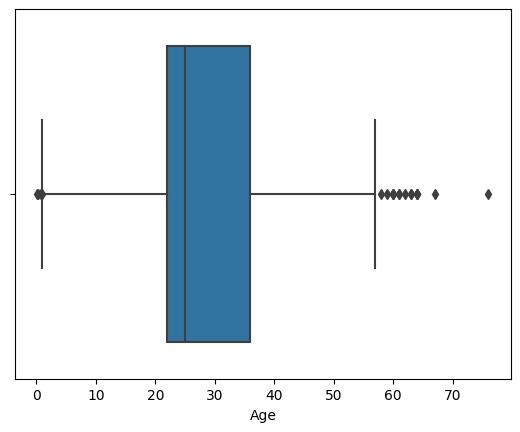

In [150]:
sns.boxplot(data=dff,x='Age');

In [151]:
dff.groupby('Pclass').Age.median()

Pclass
1    42.0
2    27.0
3    24.0
Name: Age, dtype: float64

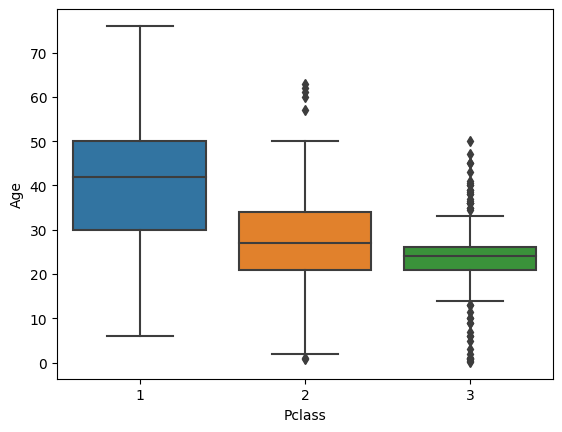

In [152]:
sns.boxplot(data=dff,x='Pclass',y='Age');

In [153]:
dff.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

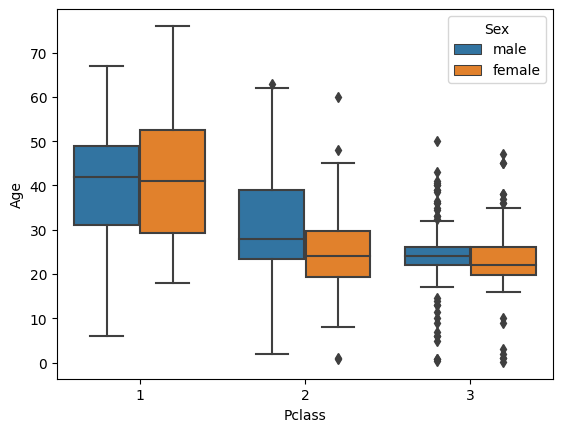

In [154]:
sns.boxplot(data=dff,x='Pclass',y='Age',hue='Sex');

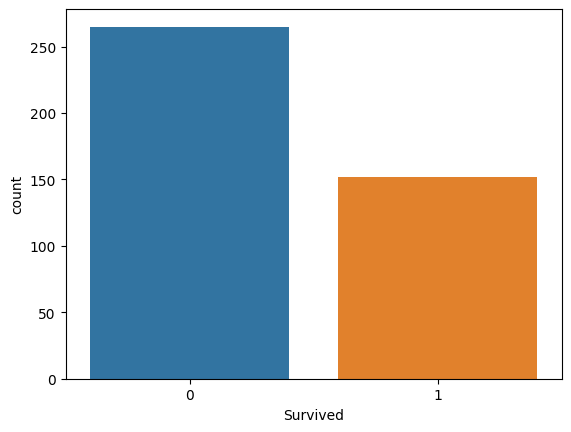

In [155]:
sns.countplot(data=dff,x='Survived');

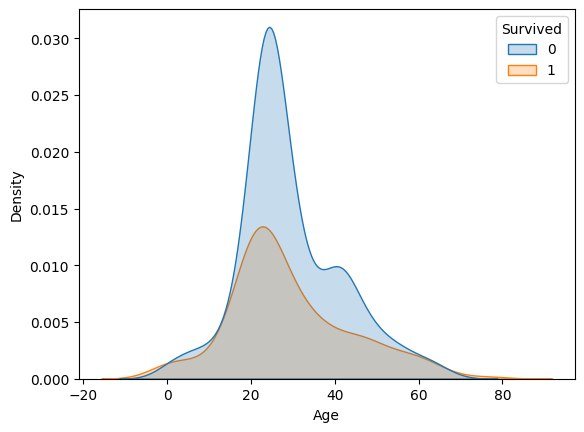

In [156]:
sns.kdeplot(data=dff, x='Age', hue='Survived', fill=True);

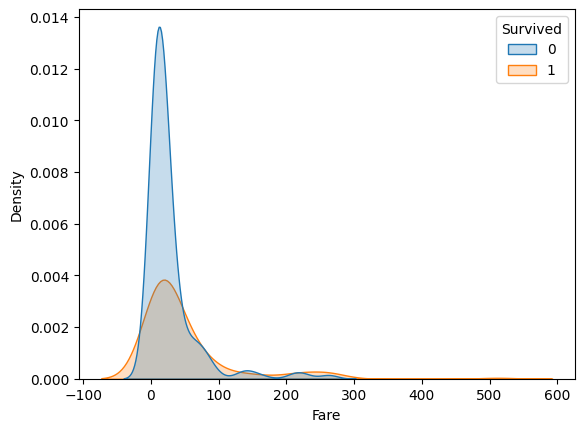

In [157]:
sns.kdeplot(data=dff, x='Fare', hue='Survived', fill=True);

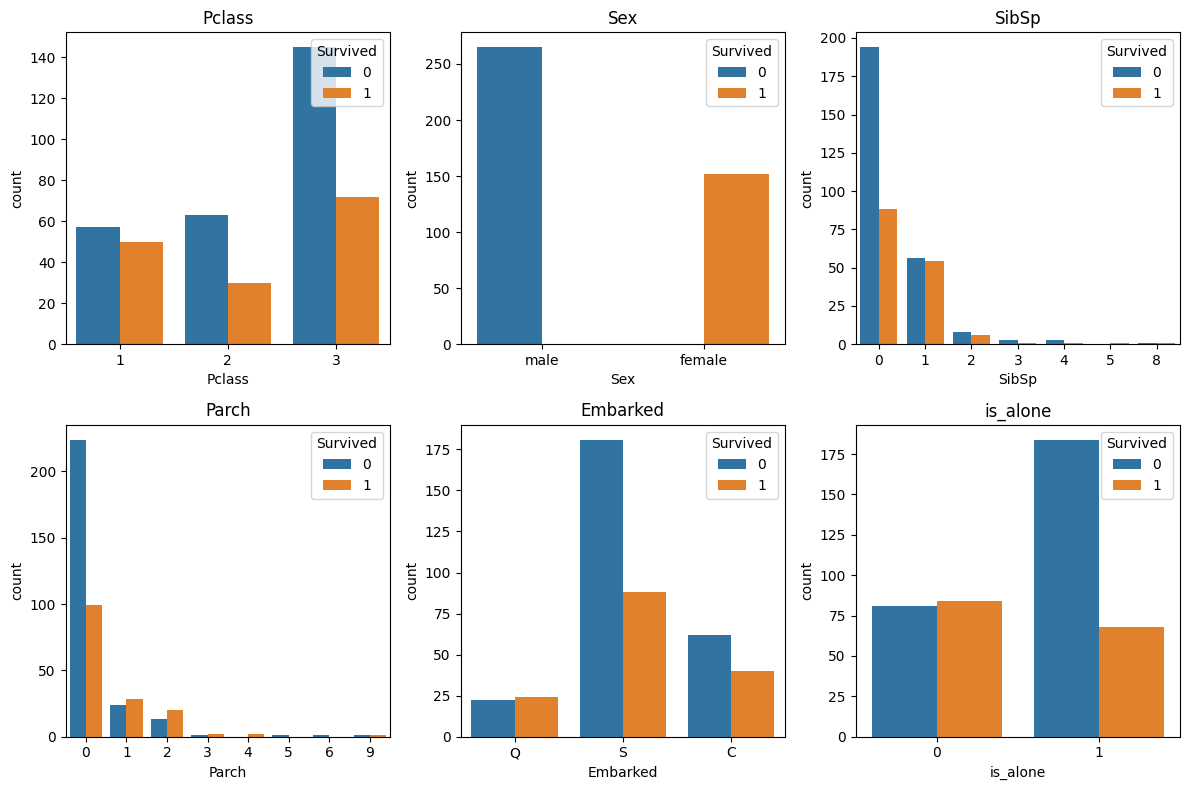

In [158]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'is_alone']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax = axs[r][c]
            sns.countplot(x=cols[i], hue='Survived', data=dff, ax=ax)
            ax.set_title(cols[i])
            ax.legend(title='Survived', loc='upper right')
        else:
            axs[r][c].axis('off')

plt.tight_layout()
plt.show()


In [159]:
print(dff.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'is_alone'],
      dtype='object')


<Axes: xlabel='Pclass', ylabel='is_alone'>

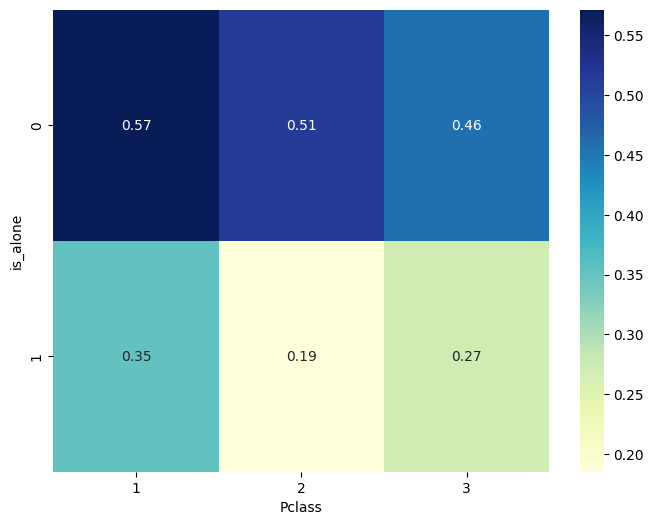

In [160]:
pivot_table = dff.pivot_table(values='Survived', index='is_alone', columns='Pclass')

# Create the plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")


<Axes: xlabel='Pclass', ylabel='Survived'>

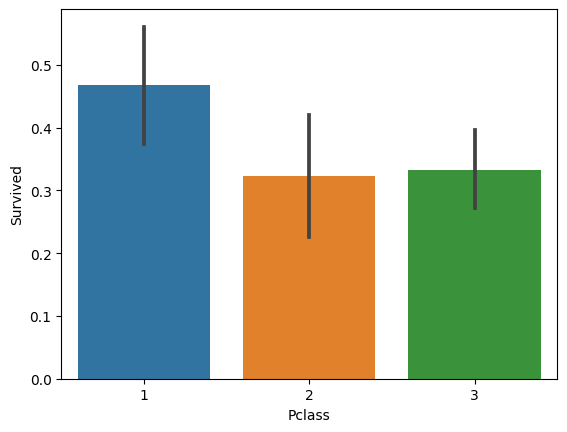

In [161]:
sns.barplot(x='Pclass',y='Survived', data=dff)

In [162]:
age=pd.cut(dff['Age'],[0,18,80])
dff.pivot_table('Survived',['Sex',age],'Pclass')

Pclass           1  2  3
Sex    Age              
female (0, 18]   1  1  1
       (18, 80]  1  1  1
male   (0, 18]   0  0  0
       (18, 80]  0  0  0

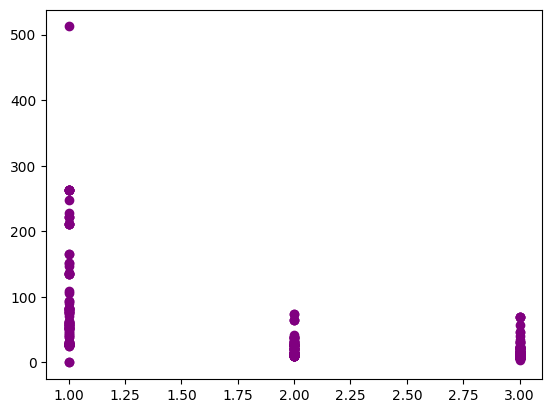

In [163]:
plt.scatter(dff['Pclass'],dff['Fare'],color='purple',label='Passenger Paid')

In [164]:
for val in dff:
    print(dff[val].value_counts())
    print()

Survived
0    265
1    152
Name: count, dtype: int64

Pclass
3    217
1    107
2     93
Name: count, dtype: int64

Sex
male      265
female    152
Name: count, dtype: int64

Age
24.0    68
22.0    38
21.0    17
30.0    15
18.0    13
        ..
67.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 78, dtype: int64

SibSp
0    282
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

Parch
0    323
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

Embarked
S    269
C    102
Q     46
Name: count, dtype: int64

is_alone
1    252
0    165
Name: count, dtype: int64



In [165]:
dff.shape

(417, 9)

In [166]:
dff.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
is_alone      int64
dtype: object

# TRAINING AND TESTING DATA

In [167]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

dff.iloc[:,2]=labelencoder.fit_transform(dff.iloc[:,2].values)

dff.iloc[:,7]=labelencoder.fit_transform(dff.iloc[:,7].values)

In [168]:
print(dff['Sex'].unique())
print(dff['Embarked'].unique())

[1 0]
[1 2 0]


In [169]:
X=dff.iloc[:,1:8].values
y=dff.iloc[:,0].values

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [171]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [172]:
def models(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train,y_train)
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train,y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train, y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train, y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    print('[0]Logistic Regression Training Accuracy : ',log.score(X_train,y_train))
    print('[1]K Neighbors Training Accuracy : ',knn.score(X_train,y_train))
    print('[2]svc Linear Training Accuracy : ',svc_lin.score(X_train,y_train))
    print('[3]svc RBF Training Accuracy : ',svc_rbf.score(X_train,y_train))
    print('[4]Gaussian NB Training Accuracy : ',gauss.score(X_train,y_train))
    print('[5]Decision Tree Training Accuracy : ',tree.score(X_train,y_train))
    print('[6]Random Forest Training Accuracy : ',forest.score(X_train,y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [173]:
model=models(X_train, y_train)

[0]Logistic Regression Training Accuracy :  1.0
[1]K Neighbors Training Accuracy :  0.993993993993994
[2]svc Linear Training Accuracy :  1.0
[3]svc RBF Training Accuracy :  1.0
[4]Gaussian NB Training Accuracy :  1.0
[5]Decision Tree Training Accuracy :  1.0
[6]Random Forest Training Accuracy :  1.0


In [174]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(y_test, model[i].predict(X_test))
        
    TN, FP, FN, TP=confusion_matrix(y_test, model[i].predict(X_test)).ravel()
        
    test_score=(TP + TN)/(TP + TN + FN +FP)
        
    print(cm)
    print('Model[{}] Testing Accuracy: "{}"'.format(i, test_score))
    print()

[[43  0]
 [ 0 41]]
Model[0] Testing Accuracy: "1.0"

[[43  0]
 [ 2 39]]
Model[1] Testing Accuracy: "0.9761904761904762"

[[43  0]
 [ 0 41]]
Model[2] Testing Accuracy: "1.0"

[[43  0]
 [ 1 40]]
Model[3] Testing Accuracy: "0.9880952380952381"

[[43  0]
 [ 0 41]]
Model[4] Testing Accuracy: "1.0"

[[43  0]
 [ 0 41]]
Model[5] Testing Accuracy: "1.0"

[[43  0]
 [ 0 41]]
Model[6] Testing Accuracy: "1.0"

